#### Assignment 6
##### Problem Statement
Create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

- The temperature
- The mean temperature each day
- The mean temperature for each month

60% of the marks will be given for the above

For the last 40%

Plot:

- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds (yer I am being nasty here)

 You do not need to over comment your code. Marks will be given for how nice the plots are."

##### 6.1 Reading in the data
Let's start by importing our libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Initially, I loaded the data directly from the URL, using the following code:
```
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
df = pd.read_csv(url)
```

Once this was loaded, I got the following error:

`C:\Users\Administrator\AppData\Local\Temp\ipykernel_5048\2833354025.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url, skiprows=23)`

The fact that there was metadata in the first few rows seemed to make it think that there were mixed data types in the columns. A visual inspection of the data confirmed that the data wasn't mixed after row 25, so I went back and added the [low_memory=False](https://www.geeksforgeeks.org/pandas-read_csv-low_memory-and-dtype-options/) option. The updated code is below:



In [2]:
# I'll load the data from the URL provided and skip the first 23 rows
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'
data = pd.read_csv(url, skiprows=23, skipinitialspace=True, low_memory=False)

Since we wanted to skip the first 23 rows, I used `iloc` for this and created a new dataframe called *knockweather*. I used the [pandas.DataFrame.head
](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) and [pandas.DataFrame.info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html#pandas-dataframe-info) methods to have a look at the data. 

In [3]:
# We want to ignore the first 23 rows so we use iloc to skip the first 23 rows
knockweather = data.iloc[23:]
# Let's display the first 5 rows of the our new DF
knockweather.head()


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
23,01-aug-1996 06:00,0,0.0,0,10.2,0,9.2,8.1,10.8,87,...,2,8.0,2,250.0,2.0,11.0,0.0,30000.0,43.0,7.0
24,01-aug-1996 07:00,0,0.0,0,10.7,0,9.5,8.3,10.9,85,...,2,7.0,2,240.0,2.0,11.0,0.0,25000.0,45.0,7.0
25,01-aug-1996 08:00,0,0.0,0,10.6,0,9.7,8.8,11.3,89,...,2,11.0,2,250.0,2.0,11.0,0.0,30000.0,42.0,7.0
26,01-aug-1996 09:00,2,0.0,0,12.0,0,10.6,9.2,11.7,83,...,2,11.0,2,250.0,21.0,62.0,0.0,30000.0,40.0,7.0
27,01-aug-1996 10:00,0,0.0,0,12.7,0,10.8,8.9,11.4,78,...,2,13.0,2,260.0,2.0,11.0,0.0,35000.0,37.0,7.0


In [4]:
# Let's get info on our dataframe
knockweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248371 entries, 23 to 248393
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    248371 non-null  object 
 1   ind     248371 non-null  int64  
 2   rain    248322 non-null  float64
 3   ind.1   248371 non-null  int64  
 4   temp    248371 non-null  float64
 5   ind.2   248371 non-null  int64  
 6   wetb    248371 non-null  float64
 7   dewpt   248371 non-null  float64
 8   vappr   248371 non-null  float64
 9   rhum    248371 non-null  int64  
 10  msl     248353 non-null  float64
 11  ind.3   248371 non-null  int64  
 12  wdsp    248321 non-null  float64
 13  ind.4   248371 non-null  int64  
 14  wddir   248319 non-null  float64
 15  ww      192885 non-null  float64
 16  w       192884 non-null  float64
 17  sun     248371 non-null  float64
 18  vis     185790 non-null  float64
 19  clht    248353 non-null  float64
 20  clamt   248353 non-null  float64
dtypes: float6

This is all reading in nicely - now we now want to check for missing values. Initially, the below output indicated that there were no missing values. The assignment question had indicated that there were missing values and a visual inspection confirmed this. Therefore I added `skipinitialspace=True` to remove spaces that has been masking the hidden values and now we had a picture of where the missing values are. Date and temperature show values of zero so we can proceed with the temperature analysis - we will address missing windspeed values later.

In [5]:
# Checking for missing values
knockweather.isna().sum()

date         0
ind          0
rain        49
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp        50
ind.4        0
wddir       52
ww       55486
w        55487
sun          0
vis      62581
clht        18
clamt       18
dtype: int64

We see from the output of `knockweather.head()`that the date column in the dataframe contains strings formatted as dates (e.g. `01-aug-1996 06:00` ). We need to convert these dates to a datetime object before we plot it. I got errors when the first plot was generated - this [was resolved](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) by incorporting `format="%d-%b-%Y %H:%M",` into the code.

In [6]:
# We convert our date column to a datetime object 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
knockweather.loc[:, 'date'] = pd.to_datetime(knockweather['date'], format="%d-%b-%Y %H:%M")

##### 6.2 Temperature over time
Now I could use matplotlib to plot temperature over time for the years 1994-2024. I amended the default colour and added gridlines and a legend.

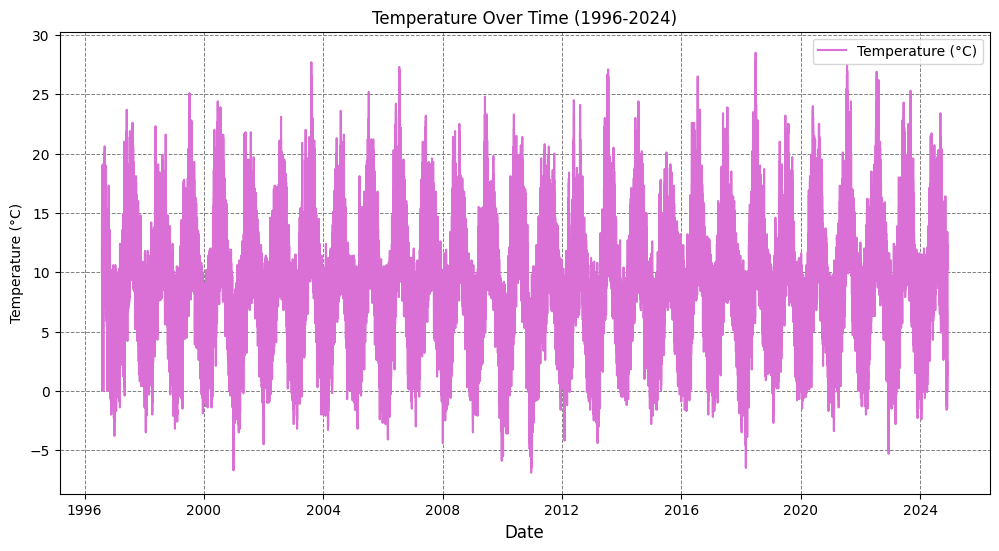

In [7]:
# Lets create the plot using matplotlib
plt.figure(figsize=(12, 6))

# Let's specify the colour (https://matplotlib.org/stable/gallery/color/named_colors.html) and add a label 
plt.plot(knockweather['date'], knockweather['temp'], color='orchid', label='Temperature (°C)')
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Temperature Over Time (1996-2024)')
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()



##### 6.3 Weather from this year (2024)
This chart is very cluttered looking as it's looking at temperatures from 1996 to present. It would be good to look at some interpretable trends, so let's use the [`series.dt.year`](https://www.geeksforgeeks.org/pandas-series-dt-year/) attribute to narrow things down to 2024. 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20096\1481405462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knockweather['date'] = pd.to_datetime(knockweather['date'], format='%d-%b-%Y %H:%M')


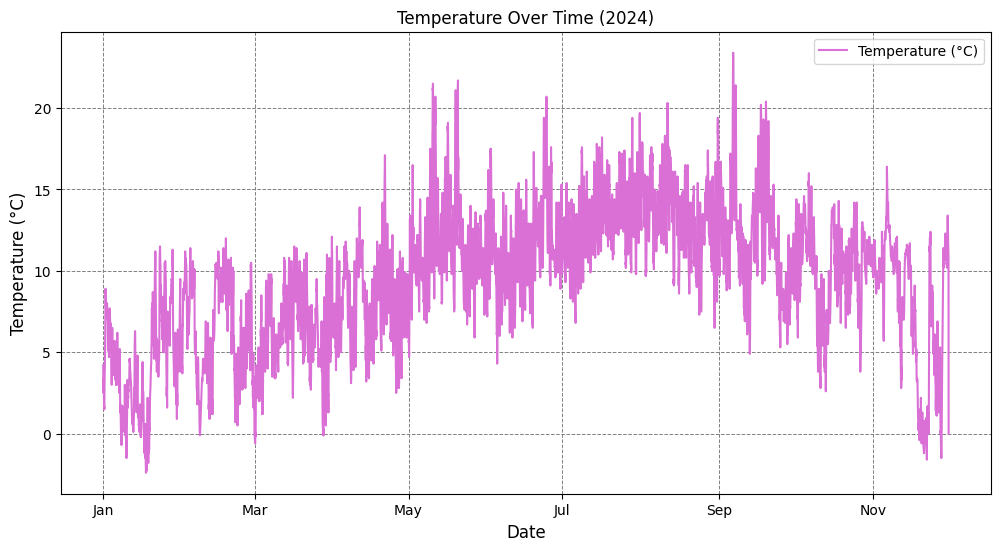

In [8]:
# See markdown cell for commentary on why this code is repeated
knockweather['date'] = pd.to_datetime(knockweather['date'], format='%d-%b-%Y %H:%M')

# Lets create a new dataframe that enables us to focus on one specific year (2024)
# https://www.geeksforgeeks.org/pandas-series-dt-year/
weather2024 = knockweather.loc[knockweather['date'].dt.year == 2024]

# Now create the plot
plt.figure(figsize=(12, 6))
plt.plot(weather2024['date'], weather2024['temp'], color='orchid', label='Temperature (°C)')

# Reformat x-axis so the months are in Jan, Feb, Mar etc. format
# https://www.geeksforgeeks.org/matplotlib-dates-dateformatter-class-in-python/

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Temperature Over Time (2024)')
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()


I had to include the code `knockweather['date'] = pd.to_datetime(knockweather['date'], format='%d-%b-%Y %H:%M')` even though it was in a previous cell, as I got the error `Can only use .dt accessor with datetimelike values` if it wasn't included.

I wanted the x-axis to display the months as `Jan` `Feb` `Mar` etc. so I used the [mdates](https://www.geeksforgeeks.org/matplotlib-dates-dateformatter-class-in-python/) module to achieve this.

We have now achieved a graph that might be more meaningful for a meteorologist - we can see the temperature variation that we associate with the seasons.

##### 6.4 Mean Daily Temperature
We can see that since temperature data is collected hourly, we have multiple temperature readings for each day. We have converted the date column into a datetime object but we want to extract just the date part of each datetime entry so we can calculate the daily mean. The `data.groupby('day')` method groups the data by the unique values in the new `day` column so we can calculate the mean.  

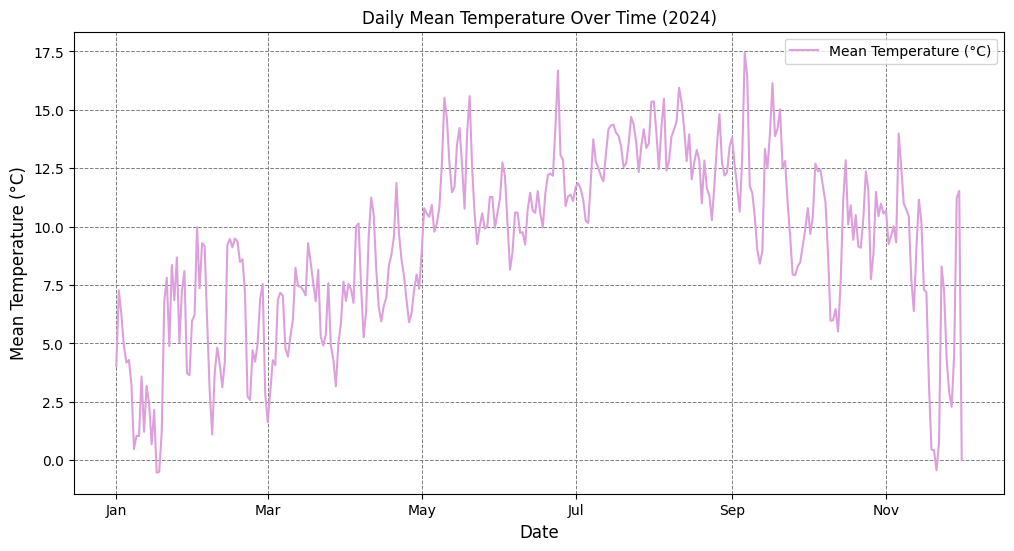

In [9]:
# We want to group by date and calculate the mean temperature
# https://www.statology.org/pandas-group-by-day/
dailymeantemp = weather2024.groupby(weather2024['date'].dt.date)['temp'].mean()

# Let's now plot the daily mean temperature
plt.figure(figsize=(12, 6))

# dailymeantemp.index gives us our x-axis values; dailymeantemp.values gives us the y-axis values
# https://pandas.pydata.org/docs/reference/api/pandas.Index.values.html
plt.plot(dailymeantemp.index, dailymeantemp.values, color='plum', label='Mean Temperature (°C)')

# Reformat x-axis so the months are in Jan, Feb, Mar etc. format
# https://www.geeksforgeeks.org/matplotlib-dates-dateformatter-class-in-python/
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b')) 
plt.xlabel('Date',fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.title('Daily Mean Temperature Over Time (2024)')
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()


We have now grouped the `weather2024` data by unique dates and calculated the mean of the temperature for each date, so we now have a series where the index is the date and the values are the daily mean temperatures (`dailymeantemp.index` gives us our x-axis values and `dailymeantemp.values` gives us the y-axis values).

We can see that this plot has a similar distribution to the temperature over time graph (2024). However since there is one data point per day rather than 24, the graph is less noisy.

##### 6.5 Mean Monthly Temperature
We will use the [`dt.to_period()`](https://www.geeksforgeeks.org/pandas-series-dt-to_period/) method to convert the dateTime series to a monthly series so we can look at the monthly mean temperature.


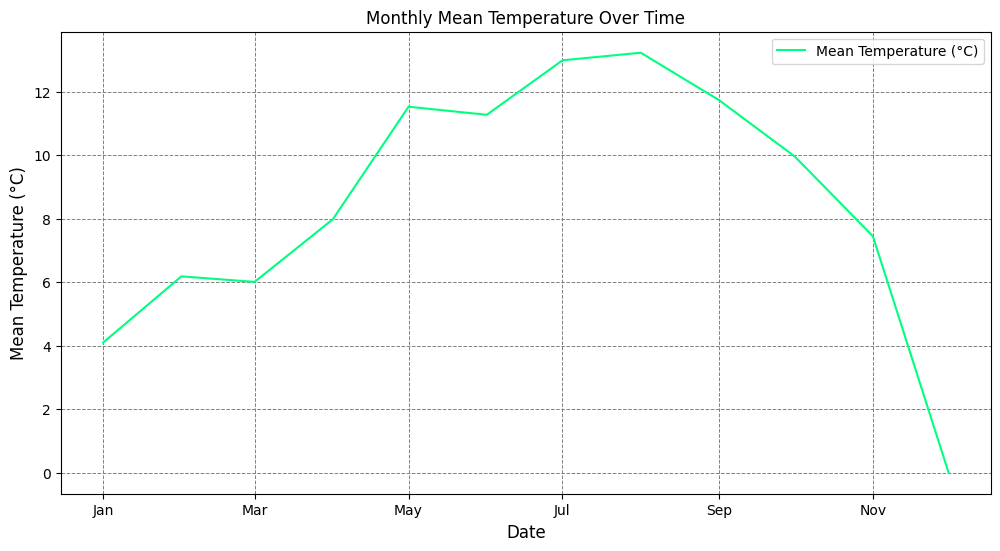

In [10]:
# This time we group by month and calculate the mean temperature
# https://www.geeksforgeeks.org/pandas-series-dt-to_period/
monthlymeantemp = weather2024.groupby(weather2024['date'].dt.to_period('M'))['temp'].mean()

# Lets plot the monthly mean temp
plt.figure(figsize=(12, 6))

# This time we are converting to a monthly series
# https://pandas.pydata.org/docs/reference/api/pandas.Index.values.html

plt.plot(monthlymeantemp.index.to_timestamp(), monthlymeantemp.values, color='springgreen', label='Mean Temperature (°C)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b')) 
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.title('Monthly Mean Temperature Over Time')
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()


In this instance, we are looking at just 12 values, rather than the 8760 values used in the temperature over time graph (2024). The graph is easier to read and shows seasonal trends, but it does hide the daily highs and lows and any extreme temperatures.

The use case for any of these graphs depends on the aims of the analyst looking at the graphs - a meteorologist might use hourly data for detailed analysis, while using monthly averages to show more long-term trends.

##### 6.6 Windspeed
I proceeded with just using the `weather2024` dataframe, as plotting the windspeed from 1996-2024 looked to be far too noisy. When we were looking at temperature, we didn't have to concern ourselves with missing values. We know from previous output that there are 50 missing values in the windspeed (`wdsp`) column - let's remind ourselves of this:

In [11]:
# Checking for missing values
missingvalues = knockweather.isna().sum()

# Let's point to the relevant bit 
for column, value in missingvalues.items():
    if column == 'wdsp':
        print(f"{column}: {value} <--------")
    else:
        print(f"{column}: {value}")


date: 0
ind: 0
rain: 49
ind.1: 0
temp: 0
ind.2: 0
wetb: 0
dewpt: 0
vappr: 0
rhum: 0
msl: 18
ind.3: 0
wdsp: 50 <--------
ind.4: 0
wddir: 52
ww: 55486
w: 55487
sun: 0
vis: 62581
clht: 18
clamt: 18


We can deal with these missing values by using [linear interpolation](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/). This works by taking existing values before and after a missing value and calculating what temperatures might fll the gap (assuming a linear relationship exists). This approach is useful for evenly spaced data where trends are expected to change consistently over time, so it's ideal for the current use case.

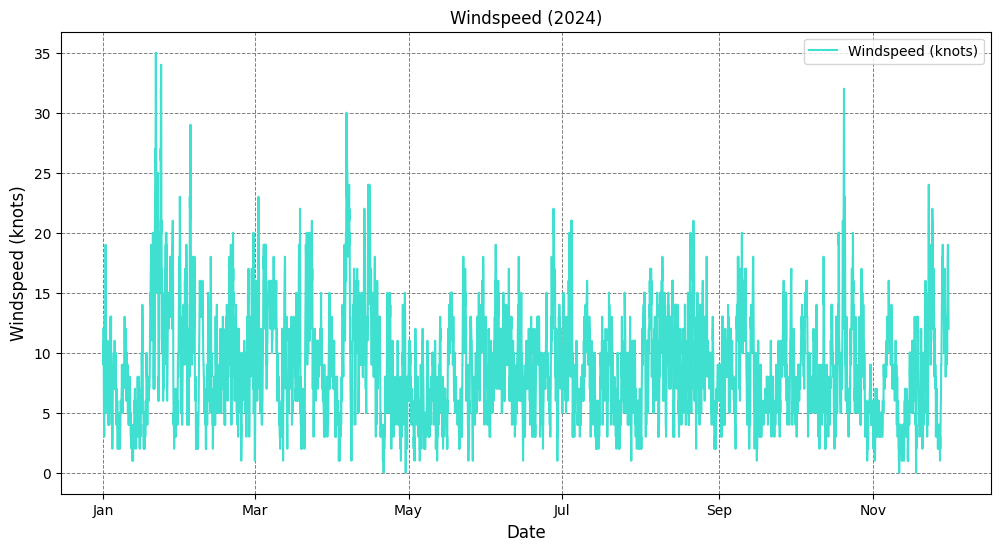

In [12]:
# We can deal with missing values by using linear interpolation 
# https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
weather2024.loc[:, 'wdsp'] = weather2024['wdsp'].interpolate(method='linear')

# Plot windspeed data over time
plt.figure(figsize=(12, 6))
plt.plot(weather2024['date'], weather2024['wdsp'], color='turquoise', label='Windspeed (knots)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b')) 
plt.xlabel('Date', fontsize=12)
plt.ylabel('Windspeed (knots)', fontsize=12)
plt.title('Windspeed (2024)')
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()



Looking at this graph, we can see there are much higher windspeeds during the winter months (most likely due to Atlantic storms) and we can see much calmer conditions during the summer. We can see occasional spikes in windspeed - these are likely to be linked to specific weather events like depressions or storms passing through the area. 

Let's amend our "mean daily temp" code (adding in linear interpolation), so that we can have a look at the daily *mean* windspeed, hopefully for a less noisy plot: 

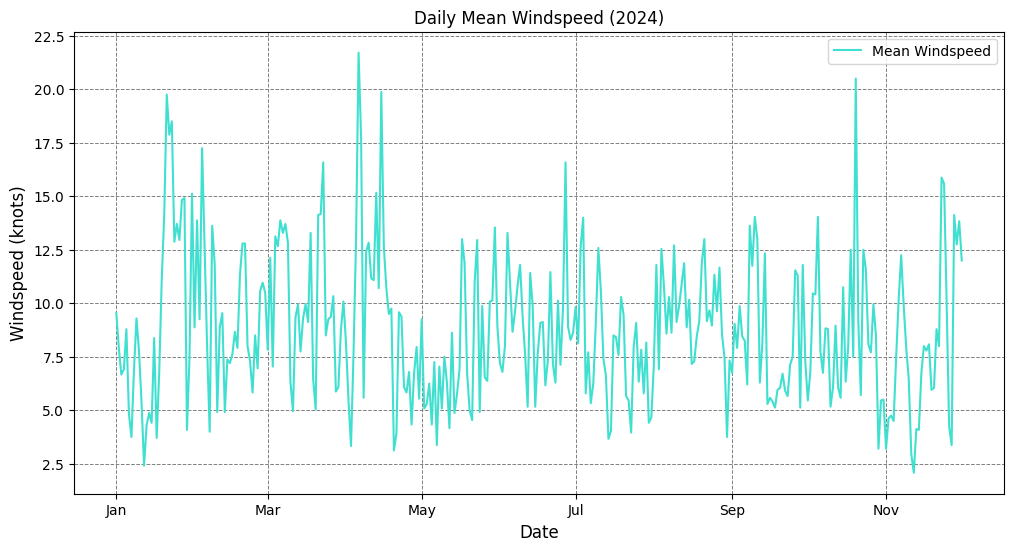

In [13]:
# Amended from daily mean temp code
# We want to group by date and calculate the mean windspeed
# https://www.statology.org/pandas-group-by-day/
weather2024.loc[:, 'wdsp'] = weather2024['wdsp'].interpolate(method='linear')
dailymeanwdsp = weather2024.groupby(weather2024['date'].dt.date)['wdsp'].mean()

# Let's now plot the daily mean temperature
plt.figure(figsize=(12, 6))

# dailymeanwdsp.index gives us our x-axis values; dailymeanwdsp.values gives us the y-axis values
# https://pandas.pydata.org/docs/reference/api/pandas.Index.values.html
plt.plot(dailymeanwdsp.index, dailymeanwdsp.values, color='turquoise', label='Mean Windspeed')

# Reformat x-axis so the months are in Jan, Feb, Mar etc. format
# https://www.geeksforgeeks.org/matplotlib-dates-dateformatter-class-in-python/
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b')) 
plt.xlabel('Date', fontsize=12)
plt.ylabel('Windspeed (knots)', fontsize=12)
plt.title('Daily Mean Windspeed (2024)')
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()

This graph is now easier to interpret and one can more readily pick out the spikes as compared with the previous plot. However, it's also important to note that due to using means, extreme values are less well represented. The spikes in February for example, go up to 35 knots, but our February daily means don't even hit 20 knots. This emphasises the importance of thoroughly exploring the data.

##### 6.7 Rolling Windspeed
Now that we have a good idea of how windspeed varies over the year, we can get more granular. To get a look at the kind of variation we can capture, let's pick a single day and plot that. Lets try my birthday. To do this we [filter](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) `weather2024` to find rows where the date column matches May, 6, 2024. 

There are no missing values on this day, so we can skip the linear interpolation.

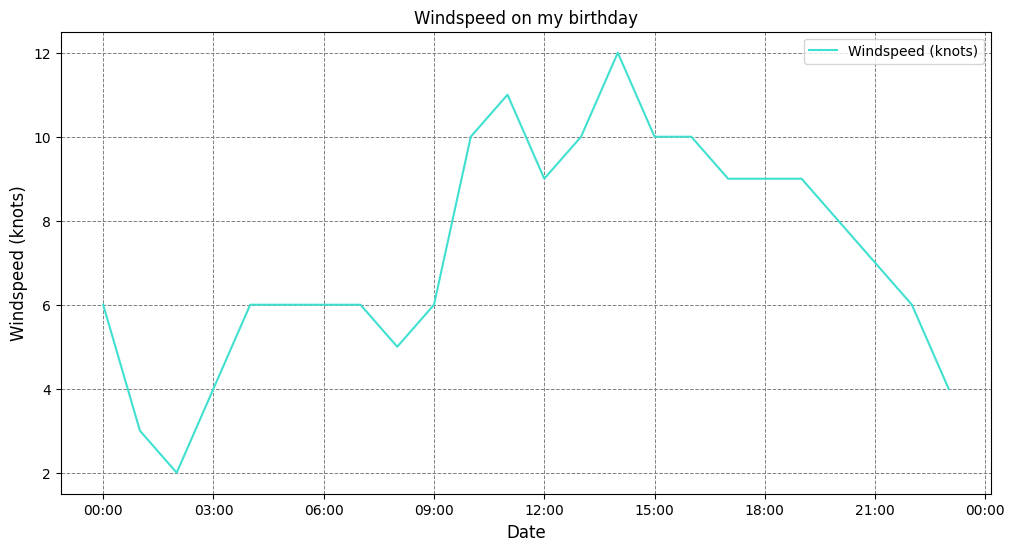

In [14]:
# Lets define my birthday- May 6th
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
mybirthday = weather2024[weather2024['date'].dt.date == pd.to_datetime('2024-05-06').date()]

# We'll plot the result
plt.figure(figsize=(12, 6))
plt.plot(mybirthday['date'], mybirthday['wdsp'], color='turquoise', label='Windspeed (knots)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M')) 
plt.xlabel('Date', fontsize=12)
plt.ylabel('Windspeed (knots)', fontsize=12)
plt.title('Windspeed on my birthday')
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()


In early May in Ireland, windspeeds are generally moderate as the weather transitions from spring to early summer - we can see this from a low of 2 knots to a high of 12 knots. 

Since we were asked to plot the "rolling windspeed", I have added the [rolling mean](https://www.statology.org/rolling-mean-pandas/) (with a window of 3). This is a statistical smoothing technique whereby the average windspeed is calculated over a sliding time window (i.e. the last 3 observations).

I got errors when running the code initially - I used the [copy()](https://www.w3schools.com/python/pandas/ref_df_copy.asp) method to avoid these - any changes made in the original dataframe are not be reflected in the copy.

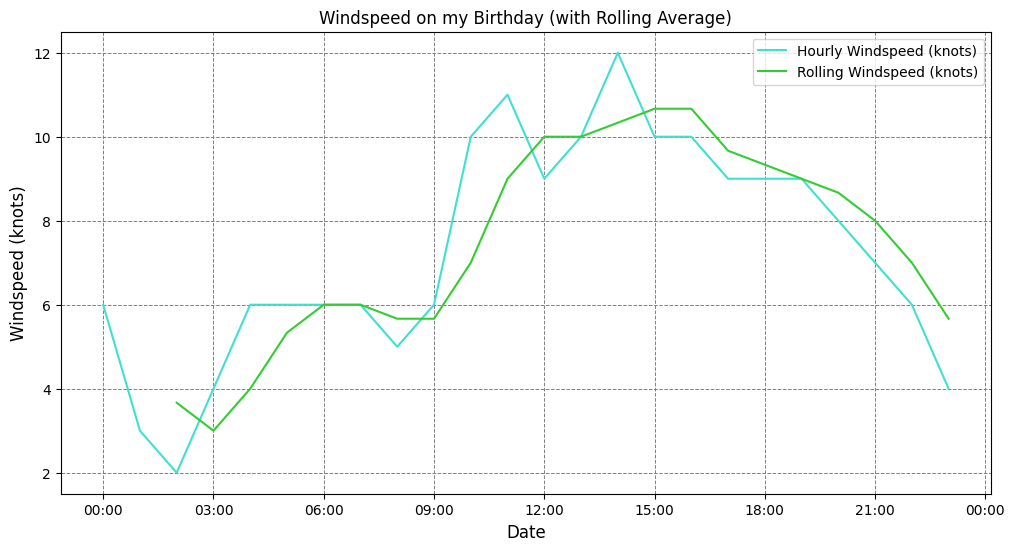

In [15]:
# Almost the same as in the previous code cell but added .copy() to prevent errors
# https://www.w3schools.com/python/pandas/ref_df_copy.asp
mybirthday = weather2024[weather2024['date'].dt.date == pd.to_datetime('2024-05-06').date()].copy()

# Add a rolling mean to smooth the windspeed data (e.g., rolling window of 3 observations)
# https://www.statology.org/rolling-mean-pandas/
mybirthday['rollingwdsp'] = mybirthday['wdsp'].rolling(window=3).mean()

# Now we can plot the original hourly windspeed plus the rolling windspeed
plt.figure(figsize=(12, 6))

# The hourly windspeed on my birthday
plt.plot(mybirthday['date'], mybirthday['wdsp'], color='turquoise', label='Hourly Windspeed (knots)')

# The rolling  mean windspeed on my birthday
plt.plot(mybirthday['date'], mybirthday['rollingwdsp'], color='limegreen', label='Rolling Windspeed (knots)')

# The remainder of the code is a repetition of the previous code cell
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Windspeed (knots)', fontsize=12)
plt.title('Windspeed on my Birthday (with Rolling Average)')
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()


##### 6.8 Max windspeed for each day
Now we are back looking at 28 years worth of data- we want to look at the maximum windspeed of each day. Since we are looking at the full range of data, I added linear interpolation back to handle the 50 missing values. Due to initial `SettingWithCopyWarning` errors, I again used the [copy()](https://www.w3schools.com/python/pandas/ref_df_copy.asp) method to create a copy of the knockweather dataframe. 

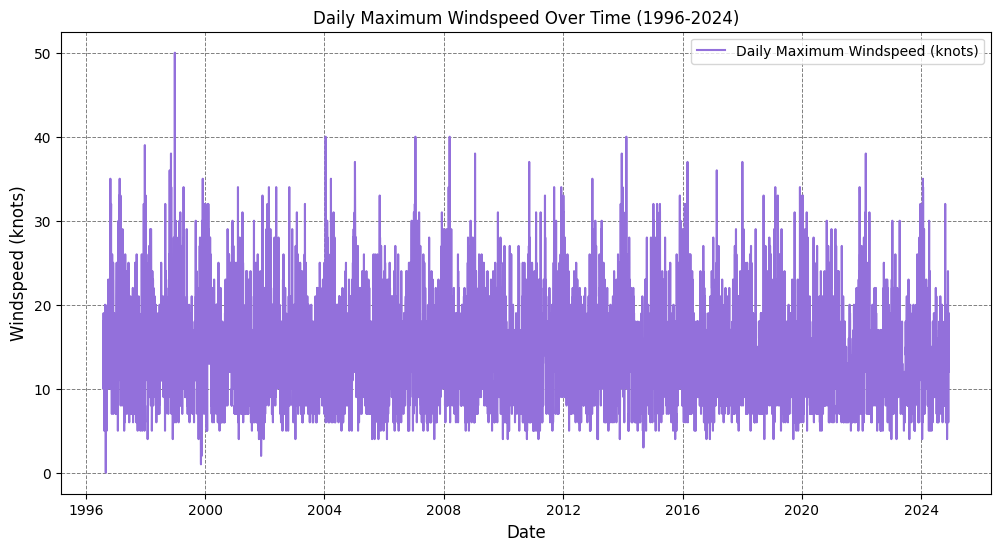

In [16]:
# Added the copy() method to avoid errors
# https://www.w3schools.com/python/pandas/ref_df_copy.asp 
knockweather = knockweather.copy()

# We'll add back linear interpolation because of missing values in 'wdsp'
knockweather['wdsp'] = knockweather['wdsp'].interpolate(method='linear')

# Then we need to extract the date part and create a day column
knockweather['day'] = knockweather['date'].dt.date

# Group by day and calculate the daily maximum windspeed
# https://www.statology.org/pandas-group-by-day/
dailymaxwdsp = knockweather.groupby('day')['wdsp'].max().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(dailymaxwdsp['day'], dailymaxwdsp['wdsp'], color='mediumpurple', label='Daily Maximum Windspeed (knots)')
plt.ylabel('Windspeed (knots)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Daily Maximum Windspeed Over Time (1996-2024)')
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()



As we can see, looking at the max windspeed for 10,220 data points (28 years of daily readings) is very noisy. If we want to look at the max windspeed on a more granular level, we can go back to the May of this year.

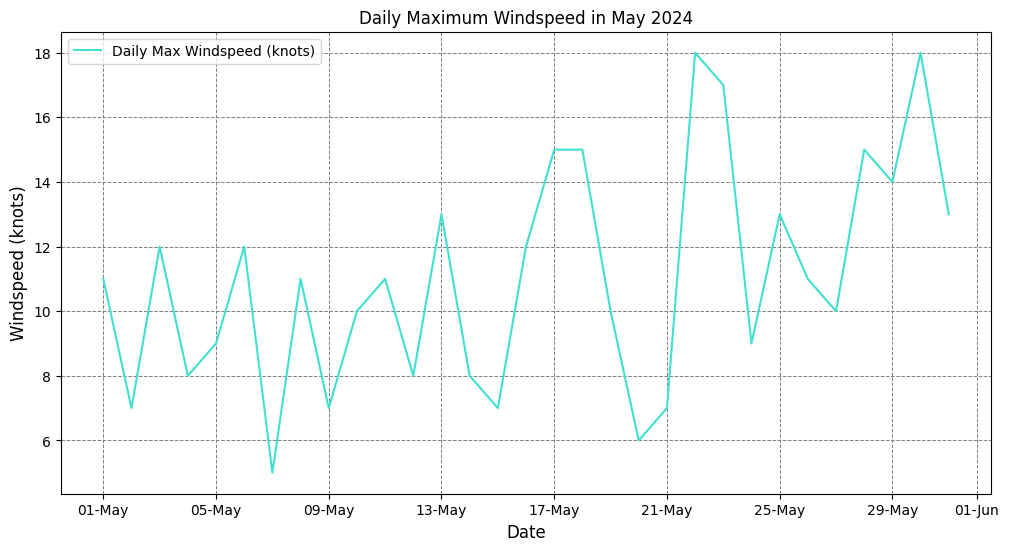

In [17]:
# We can now extract May 2024 data from knockweather
mayweather = knockweather[(knockweather['date'].dt.year == 2024) & (knockweather['date'].dt.month == 5)].copy()

# https://www.geeksforgeeks.org/how-to-reset-index-after-groupby-pandas/
# defining max windspeed as dailymaxwdsp2 to differentiate from previous code cell
dailymaxwdsp2 = mayweather.groupby('day')['wdsp'].max().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(dailymaxwdsp2['day'], dailymaxwdsp2['wdsp'], color='turquoise', label='Daily Max Windspeed (knots)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  
plt.ylabel('Windspeed (knots)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Daily Maximum Windspeed in May 2024')
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()
 

This graph is less noisy while also incorporating extremes, since it's representing max wind speed.

##### 6.9 The monthly mean of the daily max windspeeds

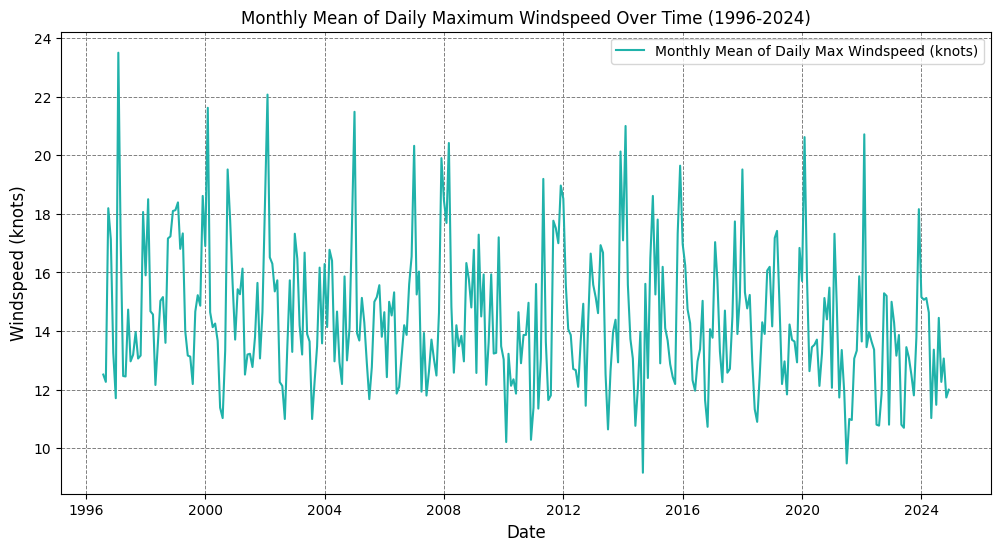

In [18]:
# First calculate the monthly mean of daily maximum windspeed 
# https://www.w3resource.com/pandas/series/series-dt-to_period.php
dailymaxwdsp['month'] = pd.to_datetime(dailymaxwdsp['day']).dt.to_period('M')  
monthlymean_maxwdsp = dailymaxwdsp.groupby('month')['wdsp'].mean().reset_index()

# Then convert 'month' back to datetime for plotting 
# https://pandas.pydata.org/docs/reference/api/pandas.Series.to_timestamp.html
monthlymean_maxwdsp['month'] = monthlymean_maxwdsp['month'].dt.to_timestamp()

# Finally create the plot
plt.figure(figsize=(12, 6))
plt.plot(monthlymean_maxwdsp['month'], monthlymean_maxwdsp['wdsp'], color='lightseagreen', label='Monthly Mean of Daily Max Windspeed (knots)')
plt.ylabel('Windspeed (knots)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Monthly Mean of Daily Maximum Windspeed Over Time (1996-2024)')
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()

##### References

1. [Pandas Read CSV Documentation (low_memory=False)](https://www.geeksforgeeks.org/pandas-read_csv-low_memory-and-dtype-options/)
2. [pandas.DataFrame.head Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)
3. [pandas.DataFrame.info Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html#pandas-dataframe-info)
4. [pandas.to_datetime Documentation](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)
5. [Matplotlib Named Colors Reference](https://matplotlib.org/stable/gallery/color/named_colors.html)
6. [Pandas Series.dt.year](https://www.geeksforgeeks.org/pandas-series-dt-year/)
7. [Matplotlib Dates DateFormatter](https://www.geeksforgeeks.org/matplotlib-dates-dateformatter-class-in-python/)
8. [Pandas Group by Day](https://www.statology.org/pandas-group-by-day/)
9. [pandas.Index.values Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Index.values.html)
10. [Pandas Series.dt.to_period](https://www.geeksforgeeks.org/pandas-series-dt-to_period/)
11. [Handling Missing Data in Pandas](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/)
12. [Pandas Rolling Mean](https://www.statology.org/rolling-mean-pandas/)
13. [Reset Index in Pandas](https://www.geeksforgeeks.org/how-to-reset-index-after-groupby-pandas/)
14. [pandas.DataFrame.copy Documentation](https://www.w3schools.com/python/pandas/ref_df_copy.asp)
15. [Pandas Series.dt.to_period - W3Resource](https://www.w3resource.com/pandas/series/series-dt-to_period.php)
16. [pandas.Series.to_timestamp Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_timestamp.html)

